In [1]:
def rainflow(stress_series):
    """
    This function counts the number of cycles in a stress series using the
    rainflow counting algorithm.
    """
    cycles = []
    stack = []

    # Function to add a cycle to the cycles list
    def count_cycle(peak, trough):
        mean = (peak + trough) / 2
        amplitude = abs(peak - trough) / 2
        return mean, amplitude

    for stress in stress_series:
        while len(stack) >= 2 and (
            (stress >= stack[-1] >= stack[-2]) or
            (stress <= stack[-1] <= stack[-2])
        ):
            trough = stack.pop()
            peak = stack[-1]
            cycles.append(count_cycle(peak, trough))

        stack.append(stress)

    # Count remaining half cycles
    for i in range(len(stack) - 1):
        cycles.append(count_cycle(stack[i], stack[i + 1]))

    # Bin cycles into histogram
    histogram = {}
    for mean, amplitude in cycles:
        key = (round(mean, 2), round(amplitude, 2))  # Adjust precision as needed
        histogram[key] = histogram.get(key, 0) + 1

    return [(mean, amp, count) for (mean, amp), count in histogram.items()]

# Example usage
stress_series = [0, 1, -1, 2, -2, 0]  # Replace with your data
histogram = rainflow(stress_series)
print(histogram)


[(0.5, 0.5, 1), (0.0, 1.0, 1), (0.5, 1.5, 1), (0.0, 2.0, 1), (-1.0, 1.0, 1)]


In [2]:
import pandas as pd
import matplotlib.pyplot as plt

Text(0, 0.5, 'stress')

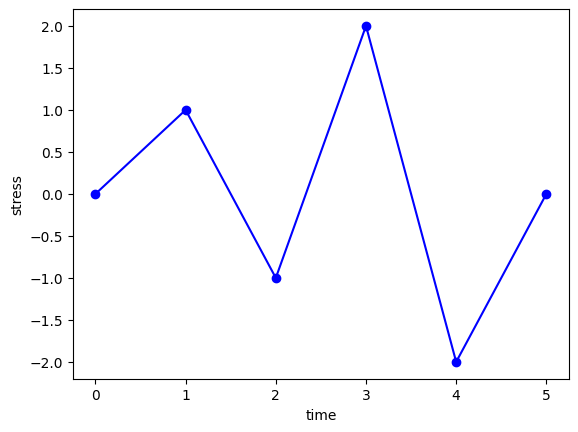

In [12]:
plt.plot(range(len(stress_series)), stress_series,
         marker='o', linestyle='-', color='b', )
plt.xlabel('time')
plt.ylabel('stress')

In [8]:
import numpy as np

histogram_numpy = np.array(histogram)

In [9]:
histogram_numpy

array([[ 0.5,  0.5,  1. ],
       [ 0. ,  1. ,  1. ],
       [ 0.5,  1.5,  1. ],
       [ 0. ,  2. ,  1. ],
       [-1. ,  1. ,  1. ]])

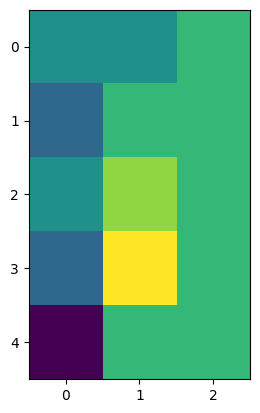

In [10]:
plt.imshow(histogram_numpy)